In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import  PIL
from PIL import  ImageEnhance , ImageOps , Image
from matplotlib import pyplot
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
plt.rcParams["figure.figsize"] = (16,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

In [3]:
path = 'Train'
image_height = 30
image_width = 30

In [4]:
numberOfClasses = len(os.listdir(path))
numberOfClasses= numberOfClasses-1
numberOfClasses

43

In [5]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' 
          }

In [6]:
def load_data(directory):
    imagesArray = list()
    labels = list()
    for data in range(numberOfClasses):
        categories = os.path.join(directory, str(data))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            imagesArray.append(image)
            labels.append(data)
    
    return imagesArray, labels

In [7]:
imagesArray, labels = load_data(path)

In [8]:
labels = to_categorical(labels)
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(np.array(imagesArray), labels, test_size=0.2)

In [10]:
x_train/=255
x_test/=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])

x_train shape: (31367, 30, 30, 3)
Number of images in x_train 31367
Number of images in x_test 7842


In [11]:
print('x_train shape:',x_test.shape)

x_train shape: (7842, 30, 30, 3)


In [12]:
input_shape=(30,30,3)

In [13]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

#Output Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(numberOfClasses, activation='softmax'))

# Compiling the model

lr = 0.001
epochs = 20
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [14]:
history = model.fit(x_train, y_train,validation_split=0.2,epochs=20)

Epoch 1/20
785/785 [==============================] - 15s 19ms/step - loss: 1.4937 - accuracy: 0.5852 - val_loss: 0.4419 - val_accuracy: 0.8797
Epoch 2/20
785/785 [==============================] - 14s 18ms/step - loss: 0.3618 - accuracy: 0.8867 - val_loss: 0.2035 - val_accuracy: 0.9433
Epoch 3/20
785/785 [==============================] - 14s 18ms/step - loss: 0.2172 - accuracy: 0.9341 - val_loss: 0.1407 - val_accuracy: 0.9598
Epoch 4/20
785/785 [==============================] - 14s 18ms/step - loss: 0.1592 - accuracy: 0.9498 - val_loss: 0.1511 - val_accuracy: 0.9566
Epoch 5/20
785/785 [==============================] - 14s 18ms/step - loss: 0.1227 - accuracy: 0.9616 - val_loss: 0.0833 - val_accuracy: 0.9777
Epoch 6/20
785/785 [==============================] - 14s 18ms/step - loss: 0.1036 - accuracy: 0.9677 - val_loss: 0.0885 - val_accuracy: 0.9753
Epoch 7/20
785/785 [==============================] - 14s 18ms/step - loss: 0.0886 - accuracy: 0.9718 - val_loss: 0.0644 - val_accuracy:

In [23]:
loss, accuracy = model.evaluate(x_test, y_test)

print('The Accuracy of testing our Model is: ', accuracy * 100)

246/246 [==============================] - 1s 5ms/step - loss: 0.0400 - accuracy: 0.9911
The Accuracy of testing our Model is:  99.1073727607727


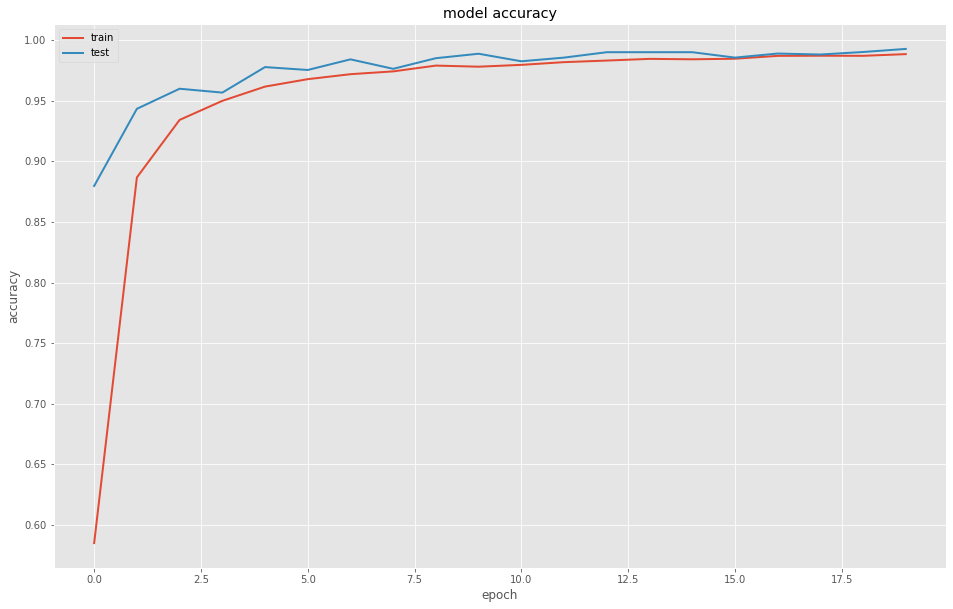

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
def testImage(index):
    plt.imshow(x_test[index])
    n = np.array(x_test[index])
    print(n.size)
    reshapedImage = n.reshape(1, 30, 30, 3)
    predictions = classes[model.predict(reshapedImage).argmax()]

    print("The predicted image is {}".format(predictions))

2700
1/1 [==============================] - 0s 77ms/step
The predicted image is Pedestrians


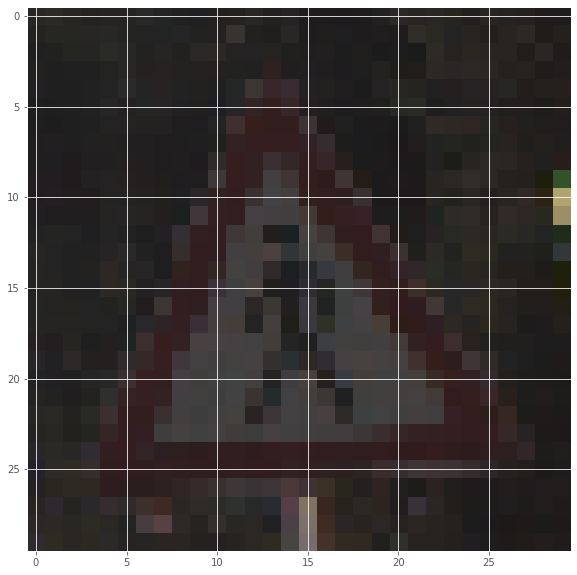

In [18]:
testImage(0)

2700
1/1 [==============================] - 0s 14ms/step
The predicted image is Right-of-way at intersection


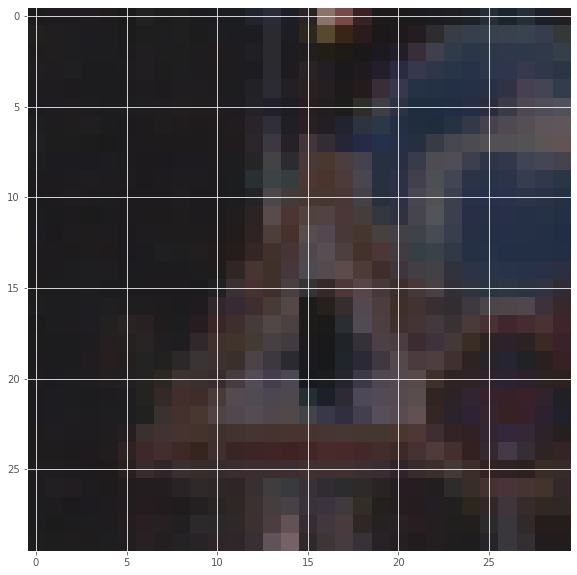

In [19]:
testImage(234)

2700
1/1 [==============================] - 0s 16ms/step
The predicted image is Speed limit (50km/h)


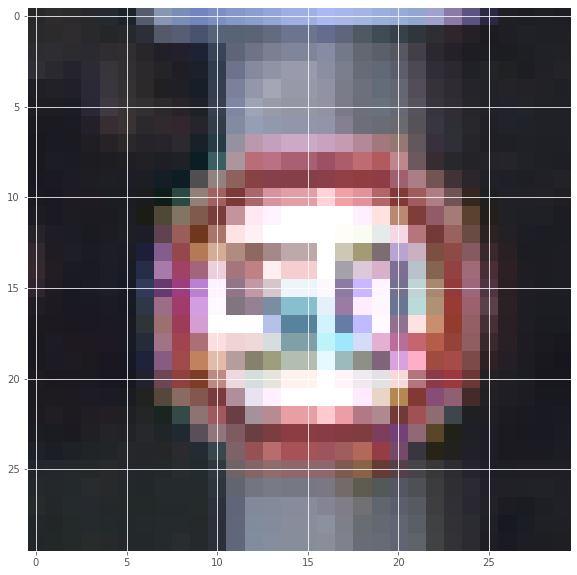

In [20]:
testImage(2300)

2700
1/1 [==============================] - 0s 16ms/step
The predicted image is General caution


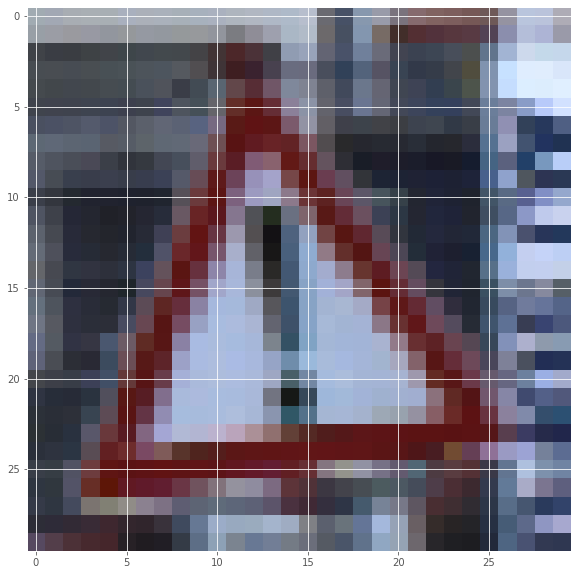

In [21]:
testImage(7822)